You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

### Part 1: Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import datetime as dt

In [2]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.2)

In [3]:
df = pd.read_csv('...Marketing_Analytics/marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


##### Column Details:

1.ID: Customer's Unique Identifier

2.Year_Birth: Customer's Birth Year

3.Education: Customer's education level

4.Marital_Status: Customer's marital status

5.Income: Customer's yearly household income

6.Kidhome: Number of children in customer's household

7.Teenhome: Number of teenagers in customer's household

8.Dt_Customer: Date of customer's enrollment with the company

9.Recency: Number of days since customer's last purchase

10.MntWines: Amount spent on wine in the last 2 years

11.MntFruits: Amount spent on fruits in the last 2 years

12.MntMeatProducts: Amount spent on meat in the last 2 years

13.MntFishProducts: Amount spent on fish in the last 2 years

14.MntSweetProducts: Amount spent on sweets in the last 2 years

15.MntGoldProds: Amount spent on gold in the last 2 years

16.NumDealsPurchases: Number of purchases made with a discount

17.NumWebPurchases: Number of purchases made through the company's web site

18.NumCatalogPurchases: Number of purchases made using a catalogue

19.NumStorePurchases: Number of purchases made directly in stores

20.NumWebVisitsMonth: Number of visits to company's web site in the last month

21.AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)

22.AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)

23.AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)

24.AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)

25.AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)

26.Response: 1 if customer accepted the offer in the last campaign, 0 otherwise (Target variable)

27.Complain: 1 if customer complained in the last 2 years, 0 otherwise

28.Country: Customer's location

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

The first thing we should do is transforming Income column to a float column and Dt_Customer to datetime.

In [5]:
df.columns = df.columns.str.replace(' ', '')

df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

<ipython-input-5-3c64e45eac67>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace('$', '')


In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [8]:
df.shape

(2240, 28)

In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Average income is 52247 dollars while median income is 51300 dollars.
Average age is 53 years old and the oldest customer is 128 years old.

Now let's see the null values in the dataset.

In [11]:
df.isnull().sum().sort_values(ascending = False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

Income feature contains 24 null values. Plotting the distribution will give more information.

Text(0, 0.5, 'count')

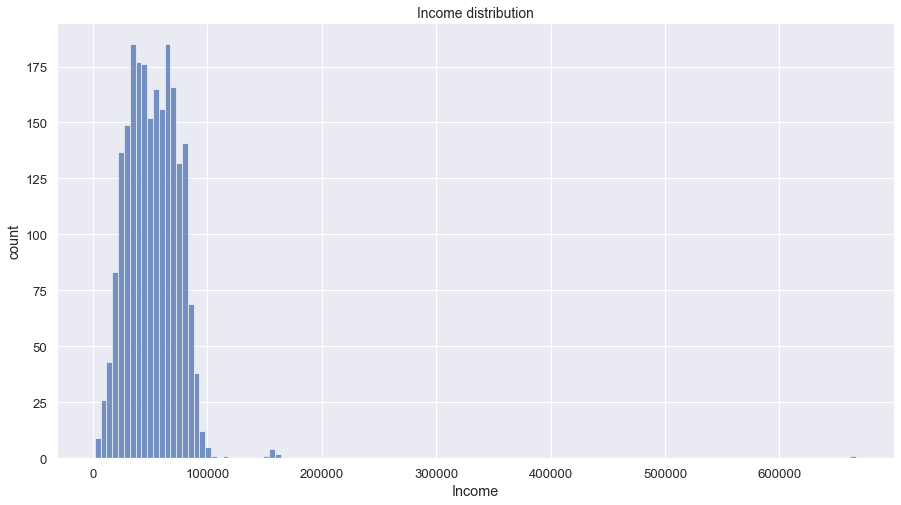

In [12]:
plt.figure(figsize=(15, 8))
sns.histplot(df['Income'], kde=False)
plt.title('Income distribution', fontsize = 14)
plt.ylabel('count')

<AxesSubplot:>

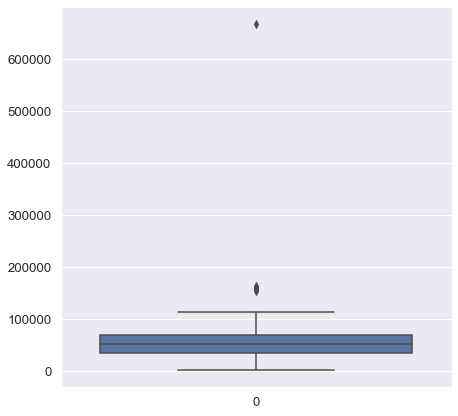

In [13]:
plt.figure(figsize=(7, 7))
sns.boxplot(data = df['Income'], orient = "v")

Most incomes are distributed between 0 - 100000 dollars, with a few outliers. 

Impute null values in Income, using median value (to avoid skewing of the mean due to outliers):

In [14]:
df['Income'] = df['Income'].fillna(df['Income'].median())

Let's check if there are outliers in other features too.

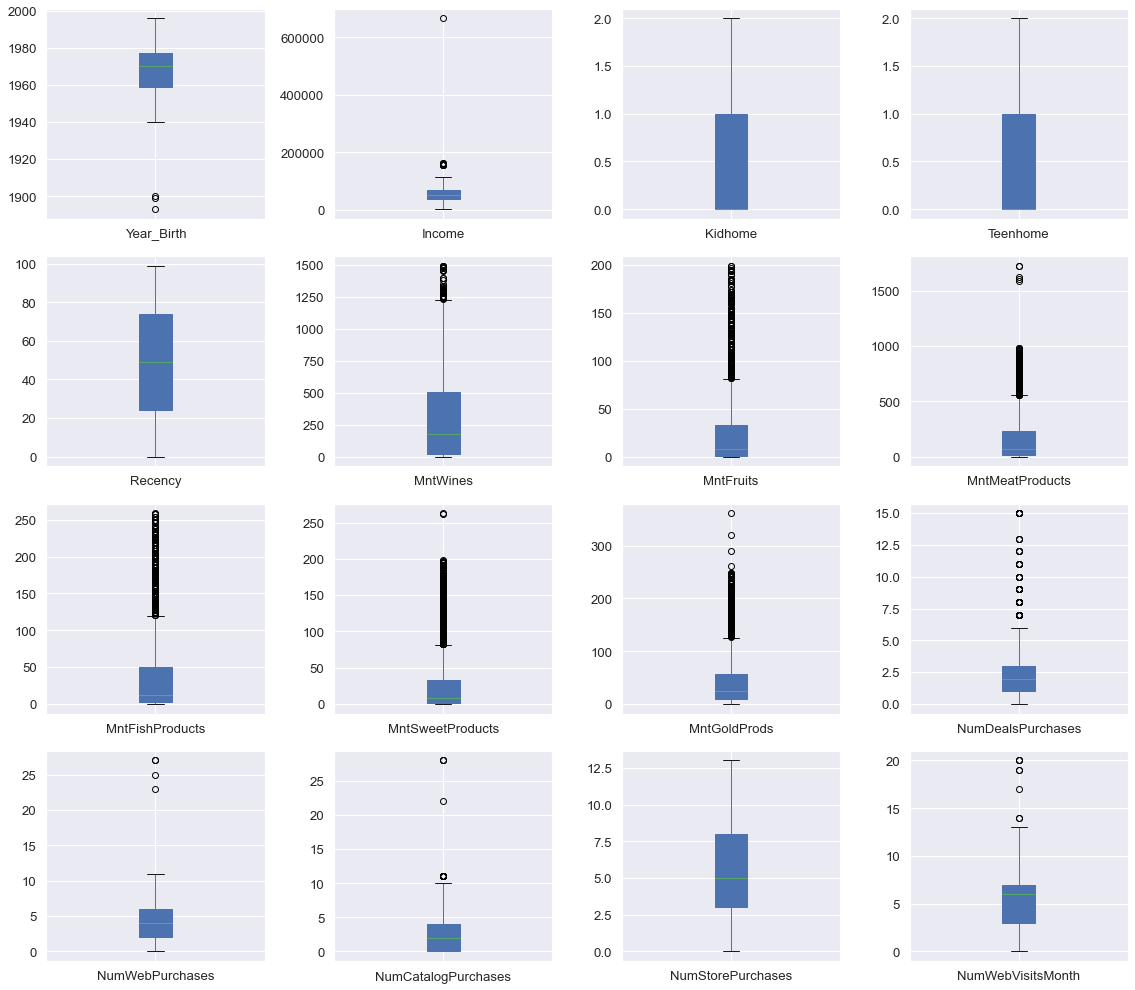

In [15]:
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                              'AcceptedCmp4', 'AcceptedCmp5', 
                              'Response', 'Complain']).select_dtypes(include=np.number)

df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(16,14), patch_artist=True)

plt.tight_layout()


Many features contain outliers, but the only that likely indicate data errors is Year_Birth. To solve this we will eliminate all the records with Year_Birth <= 1900

<AxesSubplot:>

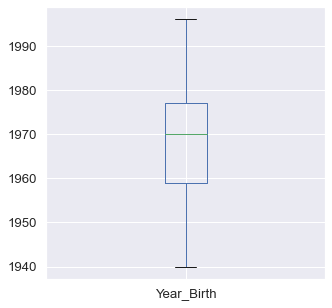

In [16]:
df = df[df['Year_Birth'] > 1900].reset_index(drop = True)

plt.figure(figsize=(5,5))
df['Year_Birth'].plot(kind='box')

Looking at the column details, we can add new useful variables to the dataset. For example, total amount spent in the last 2 years:

Number of dependents in the home ('Dependents') can be obtained from the sum of 'Kidhome' and 'Teenhome'.

Age in replacement of the variable Year_birth.

Total amount spent ('TotalMnt') can be obtained from the sum of all features containing 'Mnt'.

Total purchases ('TotalPurchases') can be obtained from the sum of all features containing 'Purchases'.

Total number of campaigns accepted ('TotalCampaignsAcc') can be obtained from the sum of all features containing 'Cmp' and 'Response' (the latest campaign)

Marital_Situation by grouping the different marital status in only 2 comprehensive categories : In couple vs Alone.


In [17]:
    #Age
current_year = dt.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

    #Dependants = Kidhome + Teenhome
df['Dependents'] = df['Kidhome'] + df['Teenhome']

    #Year_Customer can be extracted from Dt_Customer
df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

    #Purchases can be extracted from columns with 'Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

    #TotalAmount spent can be extracted from columns with 'Mnt'
amount_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalAmount'] = df[amount_cols].sum(axis=1)

    #Total Campaigns accepted can be extracted from columns with Cmp or Response
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response']
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

    #Marital_Situation
df['Marital_Situation']= df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple',
                                                          'Together':'In couple','Absurd':'Alone','Widow':'Alone',
                                                          'YOLO':'Alone'})

In [18]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Dependents,Year_Customer,TotalPurchases,TotalAmount,TotalCampaignsAcc,Marital_Situation
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,0,2014,15,1190,1,Alone
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,0,2014,18,577,2,Alone
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,1,2014,11,251,0,In couple
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,2,2014,4,11,0,In couple
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,1,2014,8,91,2,Alone


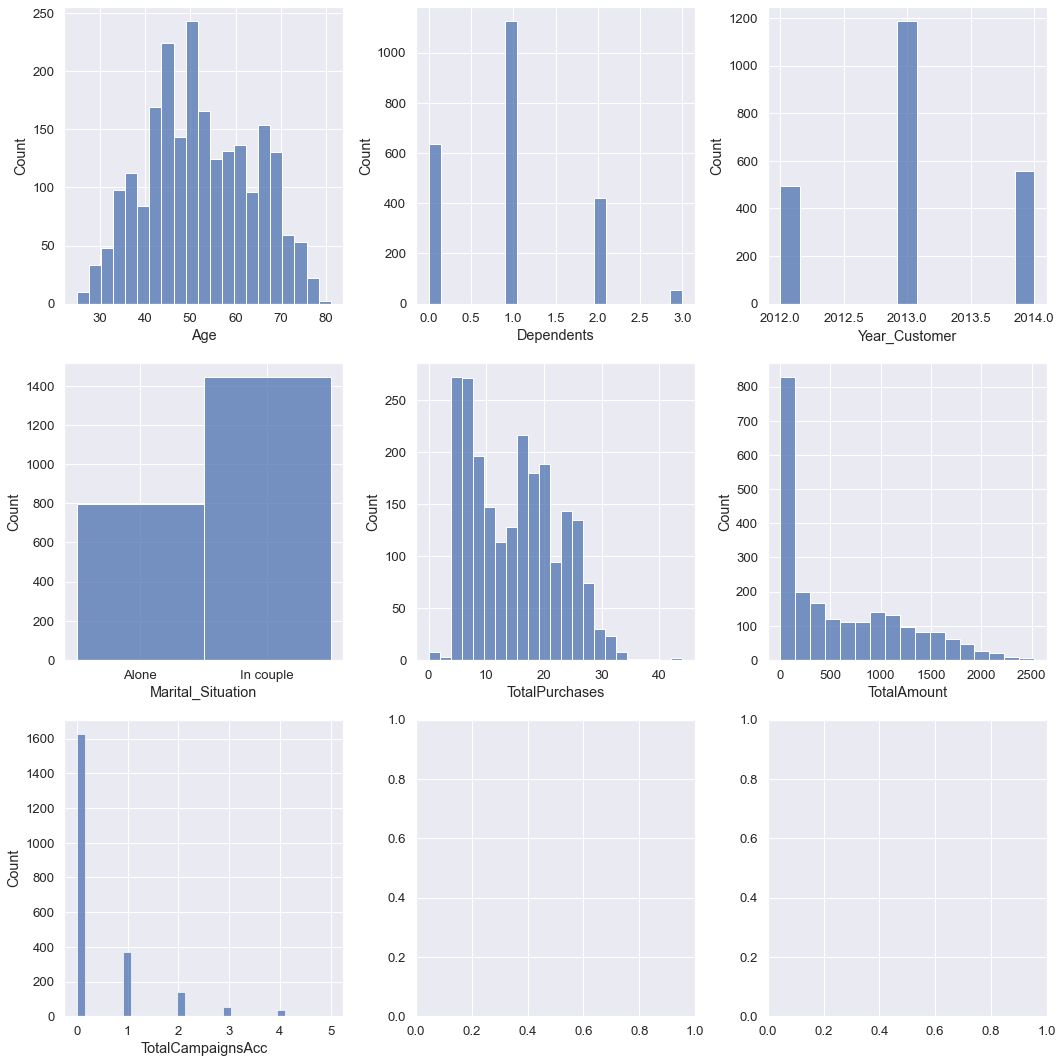

In [19]:
df_new_features = pd.DataFrame(data=df, columns = ['Age', 'Dependents', 'Year_Customer', 'TotalPurchases', 'TotalAmount', 
 
                                                   'TotalCampaignsAcc', 'Marital_Situation'])


fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=False)

sns.histplot(x='Age', data=df_new_features, ax=axes[0, 0])
sns.histplot(x='Dependents', data=df_new_features, ax=axes[0, 1])
sns.histplot(x='Year_Customer', data=df_new_features, ax=axes[0, 2])
sns.histplot(x='Marital_Situation', data=df_new_features, ax=axes[1, 0])
sns.histplot(x='TotalPurchases', data=df_new_features, ax=axes[1, 1])
sns.histplot(x='TotalAmount', data=df_new_features, ax=axes[1, 2])
sns.histplot(x='TotalCampaignsAcc', data=df_new_features, ax=axes[2, 0])

fig.tight_layout()

In [20]:
df_new_features.describe()

,Age,Dependents,Year_Customer,TotalPurchases,TotalAmount,TotalCampaignsAcc
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,52.098346,0.950827,2013.027716,14.870809,605.743406,0.447027
std,11.701917,0.752037,0.684704,7.676593,601.840466,0.890964
min,25.000000,0.000000,2012.000000,0.000000,5.000000,0.000000
25%,44.000000,0.000000,2013.000000,8.000000,69.000000,0.000000
50%,51.000000,1.000000,2013.000000,15.000000,396.000000,0.000000
75%,62.000000,1.000000,2013.000000,21.000000,1045.000000,1.000000
max,81.000000,3.000000,2014.000000,44.000000,2525.000000,5.000000


According to plots, customer's age is between 40 and 75 (approx.). One dependent is predominant among customers but 27% (600 out of 2237 customers) have no child. Most frecuent year of becoming customer is 2013. Most customers are in couple and realized between 5 and 35 purchases through the different methods available. Amount spent is highly right skewed, with many customers spending less than 500 dollars (35% customers haven't spent anything). Considering the number of campaigns accepted, 71.5% of customers (1600 out of 2237 customers) haven't accepted any offer from the different campaigns.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-nul

In [22]:
df = df.drop(['ID'], axis=1)

In [23]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Dependents,Year_Customer,TotalPurchases,TotalAmount,TotalCampaignsAcc
0,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,51,0,2014,15,1190,1
1,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,60,0,2014,18,577,2
2,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,63,1,2014,11,251,0
3,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,54,2,2014,4,11,0
4,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,32,1,2014,8,91,2


<AxesSubplot:>

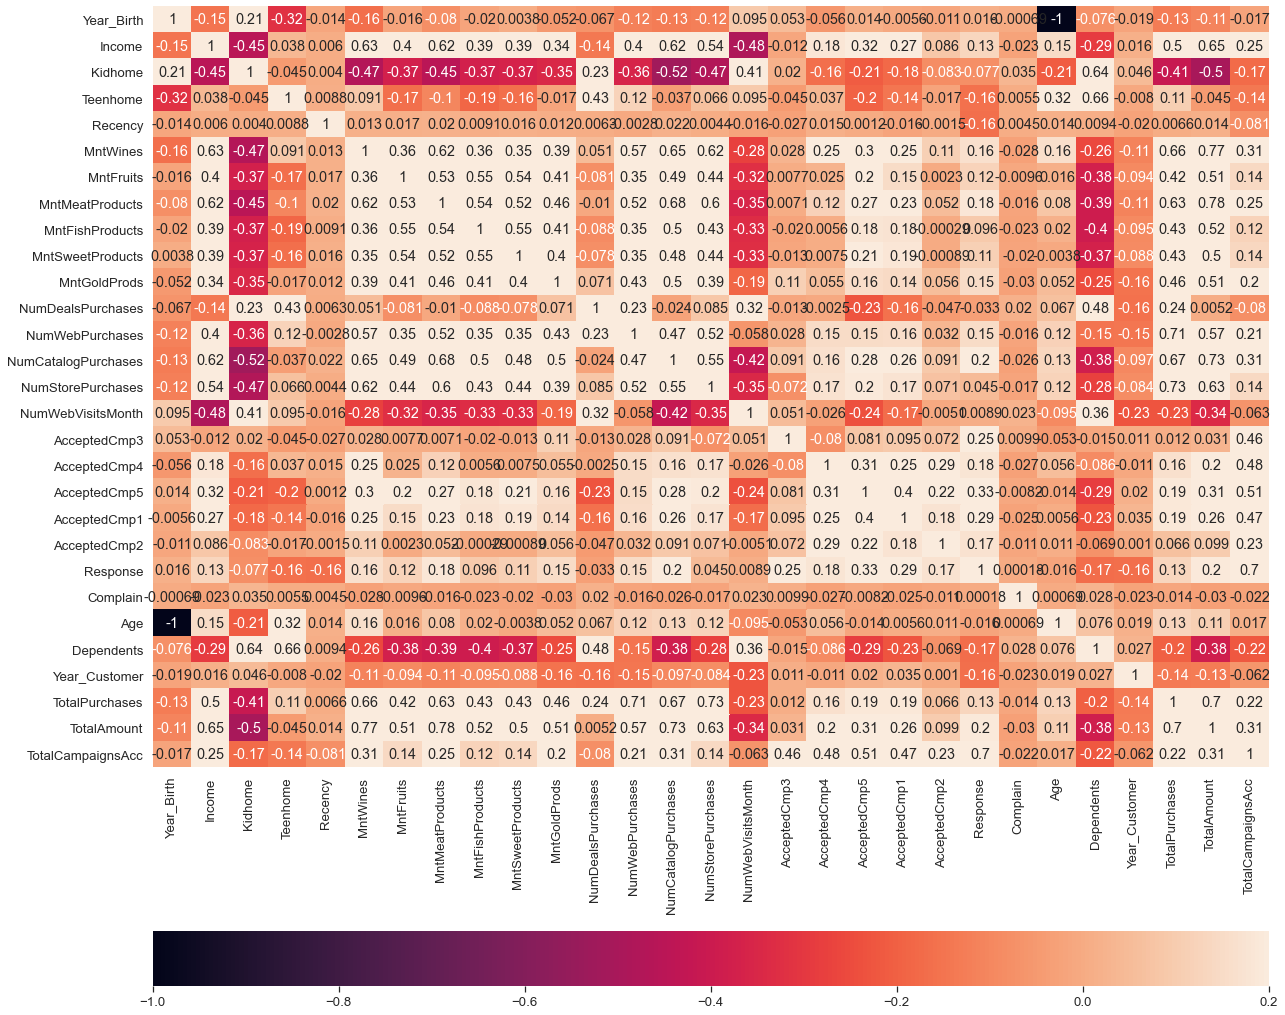

In [24]:
plt.figure(figsize = (20,20))
sns.heatmap(df[numeric_cols].corr(method = 'kendall'), cbar_kws={"orientation": "horizontal"},annot = True, vmax=.2)

### Part 2 : Data Visualization

Let's answer now some interesting questions stated by the Chief Marketing Officer.

#### Which marketing campaign is most successful?

Text(0.5, 1.0, 'Marketing campaign success rate')

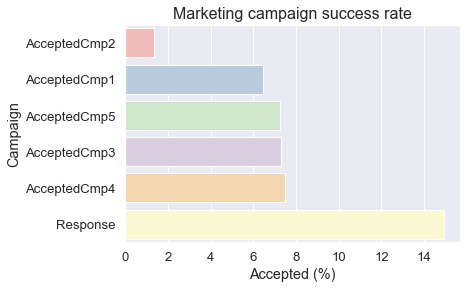

In [25]:
cmp_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, columns=['Percent']).reset_index()



sns.barplot(x='Percent', y='index', data=cmp_success.sort_values('Percent'), palette='Pastel1')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16)

Response is the best campaign with an acceptance over 14% (14% of the customer targeted accepted campaign offer).

In [26]:
cmp_success = pd.DataFrame(df[['Country','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]).groupby('Country').mean()*100

cmp_success = cmp_success.reset_index()

cmp_success['Average'] = cmp_success.mean(axis=1)
cmp_success

,Country,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Average
0,AUS,4.375000,0.000000,5.625000,3.750000,8.125000,14.375000,6.041667
1,CA,6.716418,2.238806,6.716418,8.955224,7.835821,14.179104,7.773632
2,GER,5.833333,1.666667,8.333333,9.166667,6.666667,14.166667,7.638889
3,IND,4.761905,1.360544,8.843537,7.482993,4.081633,8.843537,5.895692
4,ME,0.000000,0.000000,33.333333,0.000000,0.000000,66.666667,16.666667
5,SA,5.952381,1.190476,6.250000,5.952381,6.250000,15.476190,6.845238
6,SP,7.129799,1.462523,7.586837,8.135283,8.043876,16.087751,8.074345
7,US,6.422018,0.000000,7.339450,5.504587,4.587156,11.926606,5.963303


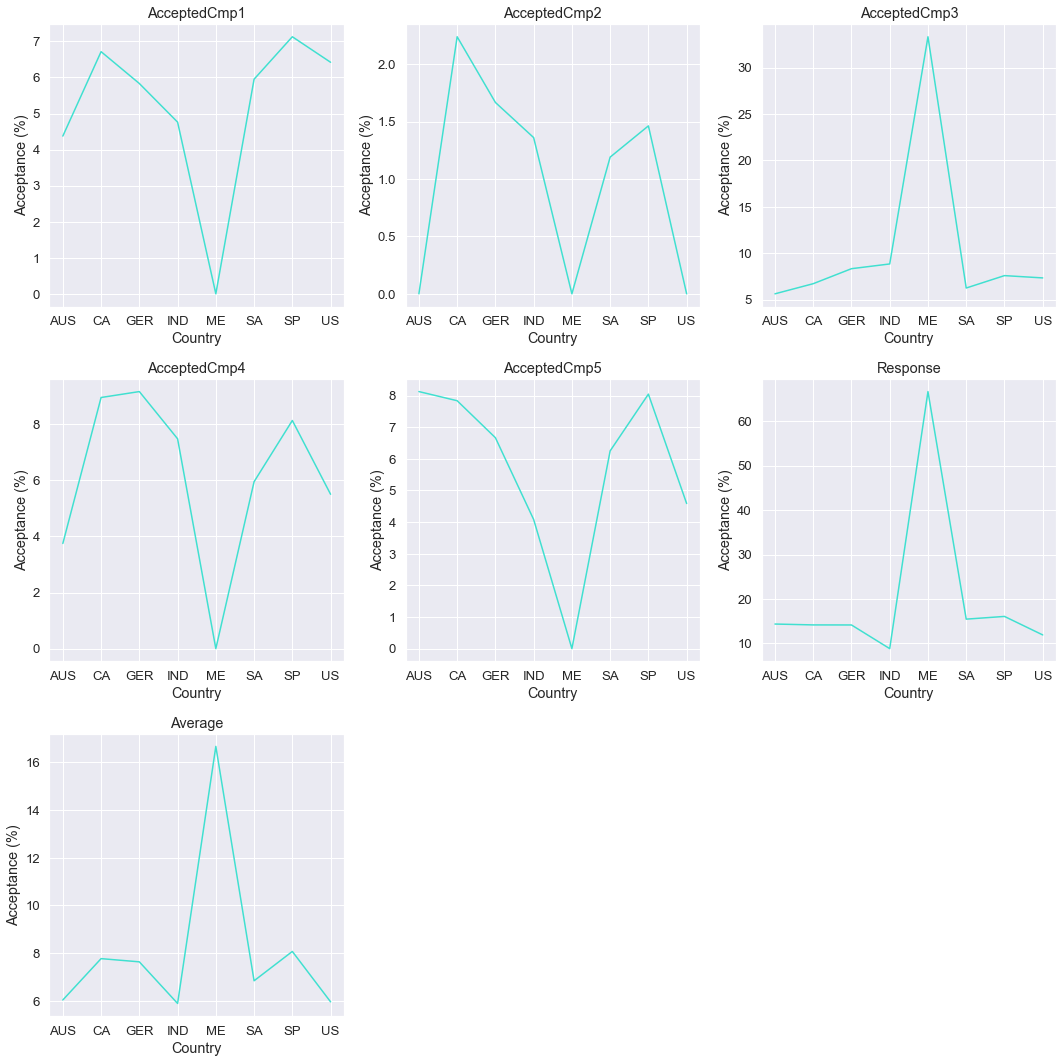

In [27]:
#  Numerical Data
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Average']

#  plot Numerical Data
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))

for i in campaigns:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel('Country')
    plt.ylabel('Acceptance (%)')
    sns.lineplot(data = cmp_success, y = i, x = 'Country', color = 'turquoise')
    c = c + 1
    
fig.tight_layout()
plt.show()

In overall, campaigns acceptance is under 8% with the exception of Mexico, whose average acceptance is over 16%. Nevertheless, if we look at the cmp_success above, Mexico had zero acceptance in 4 out of 6 campaigns. 'Response' is the campaign with the better results followed by campaign 3.

In [28]:
cmp_success.loc['mean'] = cmp_success.mean()
cmp_success

,Country,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Average
0,AUS,4.375000,0.000000,5.625000,3.750000,8.125000,14.375000,6.041667
1,CA,6.716418,2.238806,6.716418,8.955224,7.835821,14.179104,7.773632
2,GER,5.833333,1.666667,8.333333,9.166667,6.666667,14.166667,7.638889
3,IND,4.761905,1.360544,8.843537,7.482993,4.081633,8.843537,5.895692
4,ME,0.000000,0.000000,33.333333,0.000000,0.000000,66.666667,16.666667
5,SA,5.952381,1.190476,6.250000,5.952381,6.250000,15.476190,6.845238
6,SP,7.129799,1.462523,7.586837,8.135283,8.043876,16.087751,8.074345
7,US,6.422018,0.000000,7.339450,5.504587,4.587156,11.926606,5.963303
mean,NaN,5.148857,0.989877,10.503489,6.118392,5.698769,20.215190,8.112429


Overall average acceptance of campaigns is 8.11%. Lowest campaign acceptance is 0.98% (Campaign 2) and highest acceptance is 20.21% (Response).

#### What does the average customer look like for this company?

In [29]:
demographics = pd.DataFrame(round(df[['Age', 'Year_Customer', 'Income', 'Dependents',
                                      'TotalAmount','Recency']].mean(), 2), columns=['Average customer profile'])
demographics

,Average customer profile
Age,52.10
Year_Customer,2013.03
Income,52227.41
Dependents,0.95
TotalAmount,605.74
Recency,49.10


Average customer is 52 years old and became customer in 2013. His income is slightly over 52000 dollars. 
He has no child or 1 as much. 
He spent 605 dollars in the company and made his last purchase 49 days ago.

#### Which products are performing best?

Text(0, 0.5, 'Amount ($) spent on...')

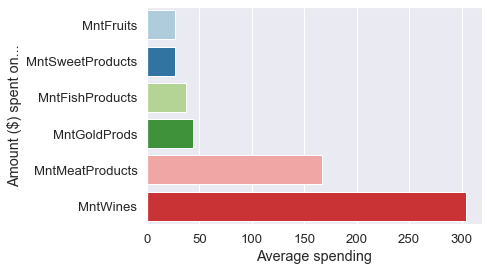

In [30]:
## list of cols for spending 
mnt_cols = [col for col in df.columns if 'Mnt' in col]

channel_cols = [col for col in df.columns if 'Num' in col]

spending = pd.DataFrame(round(df[mnt_cols].mean(), 1), columns=['Average spending']).sort_values(by='Average spending').reset_index()

ax = sns.barplot(x='Average spending', y='index', data = spending, palette='Paired')
plt.ylabel('Amount ($) spent on...')

Wine and meat are the products with higher average spending by customers. Average dollar amount spent in wine and meat is 300 and 160, respectively.

#### Which channels are performing best?

Text(0, 0.5, 'Number of ...')

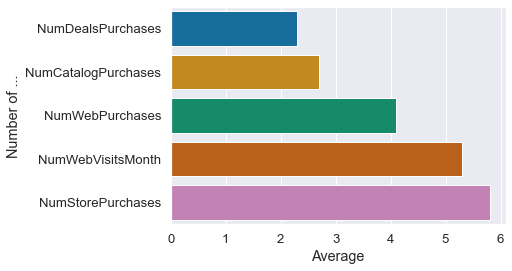

In [31]:
channels = pd.DataFrame(round(df[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

ax = sns.barplot(x='Average', y='index', data=channels, palette='colorblind')

plt.ylabel('Number of ...')

Web and store are the best sales channels (4 and 5 purchases respectively) while deals and catalog are 
underperforming.

### Part 3. Conclusions

1. Most successful campaign was the most recent, Response, specially in Mexico (acceptance over 60% rate). The campaign should be analyzed and used as sample in future advertising campaigns.

2. The most successful products are wines and meats. Company should focus in increasing sales in less popular categories.

3. Web and store are the best channels according to sales. Company should concentrate on them in order to widen the customer base.